In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)

(237, 4)


In [6]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [13]:
X= data['Head Size(cm^3)'].values
Y= data['Brain Weight(grams)'].values

In [14]:
mean_x= np.mean(X)
mean_y= np.mean(Y)
n= len(X)

numer= 0
denom= 0

for i in range(n):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
b1= numer/denom # m value in y= mx+c 
b0= mean_y-(b1*mean_x) #c= y-mx

print(b1, b0)

0.26342933948939945 325.57342104944223


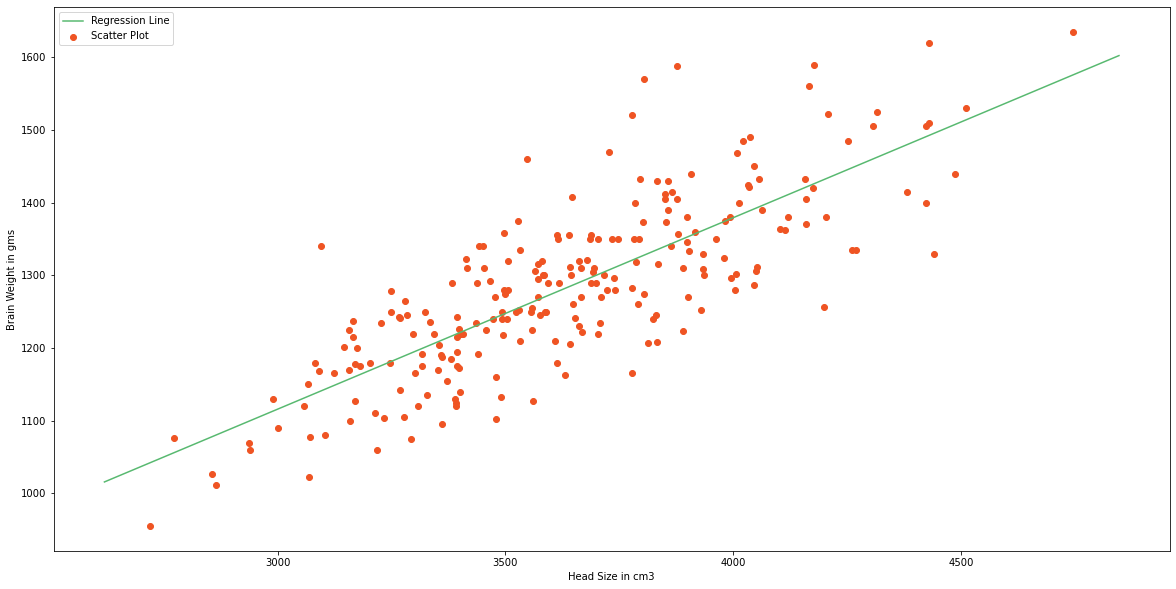

In [15]:
max_x= np.max(X) + 100
min_x= np.min(X) - 100

x= np.linspace(min_x, max_x, 1000)
y= b0 + b1*x

plt.plot(x, y, color="#58b970", label= 'Regression Line')
plt.scatter(X, Y, c="#ef5423", label= 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in gms')

plt.legend()
plt.show()

In [16]:
ss_t= 0 #total sum of squares
ss_r= 0 # total sum of sq of residuals
for i in range(n):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
r2= 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [17]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(213, 1)
(24, 1)
(213,)
(24,)


In [80]:
model = lr()
model.fit(x_train.reshape(-1,1), y_train.reshape(-1, 1))
model.predict( y_test.reshape(-1, 1))

array([[665.13697728],
       [675.89612968],
       [703.18763818],
       [657.26442675],
       [683.50626185],
       [698.72652621],
       [707.12391345],
       [646.76769271],
       [702.40038313],
       [697.93927116],
       [686.65528207],
       [631.02259165],
       [637.58305043],
       [704.49972994],
       [623.15004112],
       [642.0441624 ],
       [634.43403022],
       [686.13044536],
       [633.64677516],
       [684.81835361],
       [650.70396798],
       [688.75462887],
       [707.12391345],
       [670.3853443 ]])

In [81]:
r2_score= model.score(x_test.reshape(-1,1), y_test.reshape(-1,1))
print(r2_score)

0.6523063258292068


In [71]:
model.intercept_

array([327.00824779])

In [72]:
y_= np.array([4000])
y_= y_.reshape(-1,1)
model.predict(y_)


array([[1378.97252266]])

In [20]:
X= X.reshape((n, 1))
reg= lr()
reg= reg.fit(X, Y)
Y_pred= reg.predict(X)

r2_score= reg.score(X, Y)
print(r2_score)

0.639311719957


In [21]:
reg.coef_

array([0.26342934])

In [22]:
reg.intercept_

325.5734210494428

In [26]:
y_= np.array([4000])
y_= y_.reshape(-1,1)
reg.predict(y_)

array([1379.29077901])

In [ ]:
r3= reg.score()